## Analyzing AirBnB Data with `Pandas` and `Seaborn`

In this tutorial, we'll examine a dataset of AirBnb listings in NYC. We'll learn how to manipualte data using [Pandas](https://pandas.pydata.org/), and visualize data with [Seaborn](https://seaborn.pydata.org/).

### Step 0: Importing packages

We will be need 3 packages in this tutorial:
- Pandas 
- Seaborn
- Matplotlib

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

### Step 1: Importing the data

We import our data using Pandas' `read_csv` function:

In [2]:
data = pd.read_csv("data/airbnb_nyc_2019.csv")

Let's take a peek at the first few rows. We can do so using `head()`. By default, this will give us the first 5 rows of the dataframe. We can always modify how many rows to return by specifying a number instead the head function. For example, `data.head(2)` will return the first 2 rows:

In [3]:
data.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


We can also get the number of columns and rows of the dataframe using `data.shape`. This returns (`number of rows`, `number of columns`).

In [4]:
data.shape

(48895, 16)

Using `shape`, we can see that there are 48,895 rows and 16 columns in our dataset.

We can also get an overview of missing values and datatypes of each column. We can see below that we have 2 columns with missing values: `last_review` and `reviews_per_month`. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

###  Step 2: Data Exploration

#### How many unique neighbourhood groups are there?

In [6]:
data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

We can see that neighbourhood groups represents New York boroughs. There are 5 groups in our dataset.

#### How many neighbourhoods are in each borough?

To find out how many neighbourhoods are in each borough, we can `groupby` borough (neighbourhood group) and count the number of unique neighbourhoods using `nunique()`.

In [7]:
data.groupby('neighbourhood_group')['neighbourhood'].nunique()

neighbourhood_group
Bronx            48
Brooklyn         47
Manhattan        32
Queens           51
Staten Island    43
Name: neighbourhood, dtype: int64

We can see that Queens has the most neighbourhoods while Staten Island has the fewest.

#### What's the average cost of an AirBnB in NYC?

We can apply the `mean()` function to the `'price'` column to figure this out:

In [8]:
mean_price = data['price'].mean()
mean_price

152.7206871868289

Using Python's useful f-string funcitonality, we can easily round out mean price to the nearest decimal by adding `.2f` at the end of `mean_price`: 

In [9]:
print(f"The mean price of an AirBnb in NYC is ${mean_price:.2f}.")

The mean price of an AirBnb in NYC is $152.72.


The f-string approach does not change the actual value of `mean_price` to 2 decimals. If we wanted to permanently update `mean_price` to the 2 decimals, we could use the `round()` function:

In [10]:
round(data['price'].mean(), 2)

152.72

#### What about the median price?

We can use the `median()` method to figure out the median price.

In [11]:
median_price = data['price'].median()

print(f"The median price of an AirBnb in NYC is ${median_price}.")

The median price of an AirBnb in NYC is $106.0.


Similarly, we can use `min()` and `max()` to get the minimum and maximum price of an Airbnb respectively. 

In [12]:
min_price = data['price'].min()
max_price = data['price'].max()

print(f"The price of an Airbnb ranges from ${min_price} to ${max_price} per night.")

The price of an Airbnb ranges from $0 to $10000 per night.


Interesting! There's an Airbnb listed for $0?! Let's check it out. We can do so by sorting the values in our dataframe by price, from lowest to highest. 

In [13]:
data.sort_values(by='price').head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28


There seems to be multiple places listed at `$0`. We can figure out how many are `$0` by subsetting our dataframe to filter for only those where `price == $0`. 

In [14]:
data[data['price']==0].shape

(11, 16)

There are 11 places in our dataset that are listed at $0.

We can also visualize the distibution of price with a plot. To do this, let's use `Seaborn` - an awesome package that is great for visualizing data.

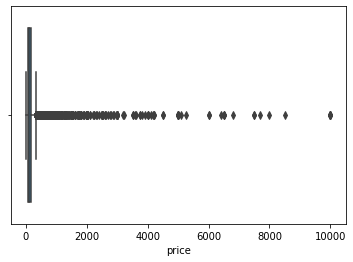

In [15]:
sns.boxplot(x='price', data=data)

We can see that most Airbnb's are below `$500`, but there are quite a few outlier that are `$2000` and beyond. Let's create a new column in our dataset that indicates whether a place is below `$500` per night. 

In [16]:
data['under_500'] = data['price']<500

In [17]:
data['under_500'].value_counts(normalize=True)

True     0.974742
False    0.025258
Name: under_500, dtype: float64

We can see that 97% of places in our dataset are under `$500`. Let's re-create our boxplot to only include places that are below `$500`.

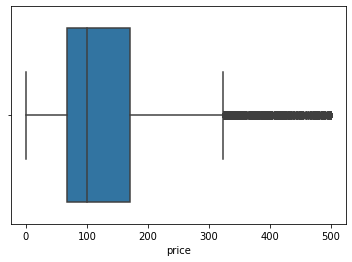

In [18]:
sns.boxplot(x='price', data=data[data['under_500']==True])

We can look at the distribution by creating a [histogram](https://en.wikipedia.org/wiki/Histogram) using `histplot`.

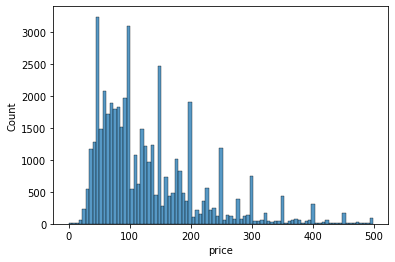

In [19]:
sns.histplot(x='price', data=data[data['under_500']==True])

#### What is the average price for each borough?

We can get the mean (average) price of an AirBnb for each borough by using `groupby` on `neighbourhood_group` and applying `mean()` on the `'price'` column.

In [20]:
data.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [21]:
data.groupby('neighbourhood_group')['price'].agg(['mean', 'median', 'max']).reset_index()

,neighbourhood_group,mean,median,max
0,Bronx,87.496792,65,2500
1,Brooklyn,124.383207,90,10000
2,Manhattan,196.875814,150,10000
3,Queens,99.517649,75,10000
4,Staten Island,114.812332,75,5000


Prices seem to be higher in Manhattan and lowest in the Bronx.

#### Let's say we wanted to stay in Brooklyn. What would be the most and least expensive place to stay in? 

In [22]:
brooklyn = data[data['neighbourhood_group']=='Brooklyn']

brooklyn_neighbourhoods = (
    brooklyn.groupby('neighbourhood')['price']
     .agg(['mean', 'median'])
     .reset_index()
)

Let's sort neighbourhoods by median price. First, let's look at the 3 neighbourhoods with highest median price.

In [23]:
brooklyn_neighbourhoods.sort_values(by='median', ascending=False).head(3)

,neighbourhood,mean,median
19,DUMBO,196.305556,189.0
44,Vinegar Hill,187.176471,175.0
34,Mill Basin,179.750000,167.5


Now, let's look at the 3 neighbourhoods with the lowest median price.

In [24]:
brooklyn_neighbourhoods.sort_values(by='median', ascending=True).head(3)

,neighbourhood,mean,median
6,Borough Park,63.066176,53.5
9,Brownsville,76.459016,62.0
41,Sheepshead Bay,105.774390,65.0


#### What are the different room types?

In [25]:
data['room_type'].value_counts(normalize=True)

Entire home/apt    0.519665
Private room       0.456611
Shared room        0.023724
Name: room_type, dtype: float64

52% of the listing are entire homes/apartments while 46% are private rooms. Only 2% are shared rooms.

#### What's the mean price for each room type?

In [26]:
data.groupby('room_type')['price'].mean()

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

We can see that enitre omes are by far the most expensive room type, and shared rooms are the cheapest room type. This makes sense. We can visualize this with a simple barplot:

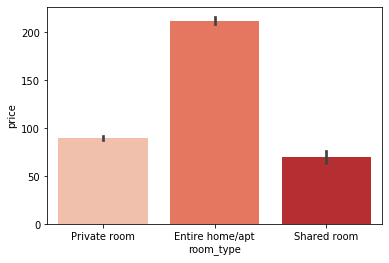

In [27]:
sns.barplot(x='room_type', y='price', data=data, palette='Reds')

Let's repeat this breakdown by borough. We can `groupby` `'neighbourhood_group'` and `'room_type'` by doing the following:

In [28]:
data.groupby(['neighbourhood_group', 'room_type'])['price'].agg(['count', 'median'])

count  median
neighbourhood_group room_type                     
Bronx               Entire home/apt    379   100.0
                    Private room       652    53.5
                    Shared room         60    40.0
Brooklyn            Entire home/apt   9559   145.0
                    Private room     10132    65.0
                    Shared room        413    36.0
Manhattan           Entire home/apt  13199   191.0
                    Private room      7982    90.0
                    Shared room        480    69.0
Queens              Entire home/apt   2096   120.0
                    Private room      3372    60.0
                    Shared room        198    37.0
Staten Island       Entire home/apt    176   100.0
                    Private room       188    50.0
                    Shared room          9    30.0

Text(0.5, 1.0, 'Mean Price of Airbnb Room Types by Borough')

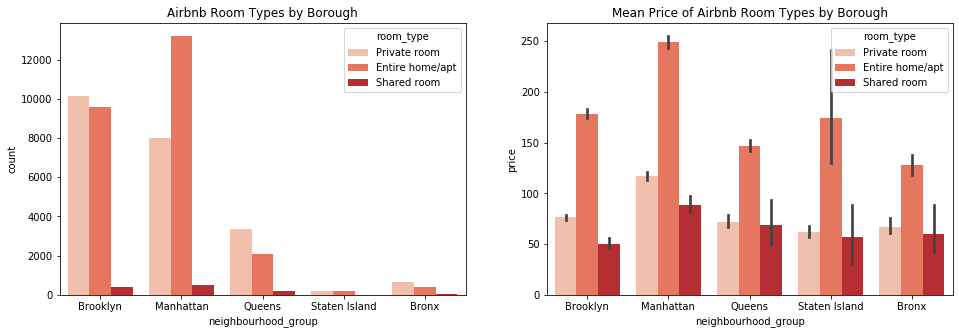

In [29]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.countplot(x='neighbourhood_group', hue='room_type', data=data, palette='Reds')
plt.title('Airbnb Room Types by Borough')

plt.subplot(1,2,2)
sns.barplot(x='neighbourhood_group', y='price', hue='room_type', data=data, palette='Reds')
plt.title('Mean Price of Airbnb Room Types by Borough')

We can see that the most frequent room time in Manhattan is the entire home, while in Brooklyn it's private room. The mean price of an entire home in Manhattan is siginficantly higher than in the other boroughs. 

### Data visualization

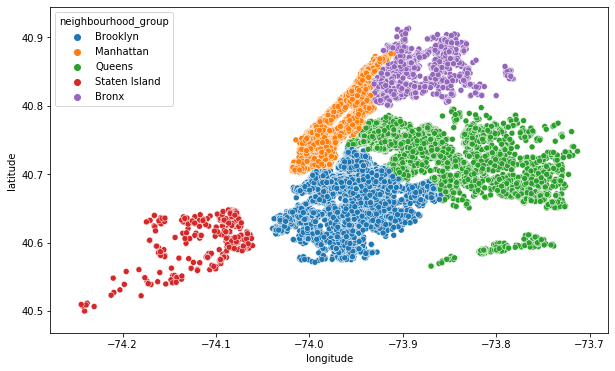

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=data)

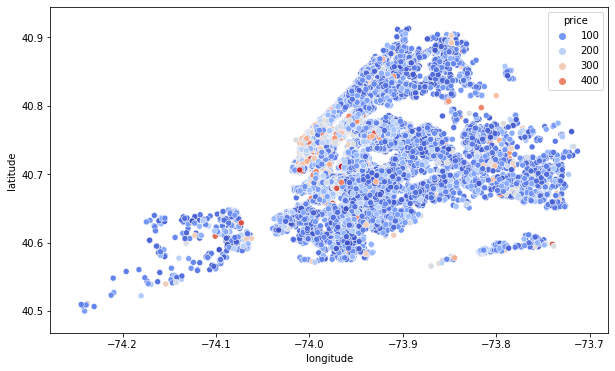

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='price', data=data[(data['under_500']==True)&(data['price']>10)], palette='coolwarm')

### Minimum nights

In [37]:
data['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [38]:
data['last_review'].isnull().value_counts(normalize=True)

False    0.794417
True     0.205583
Name: last_review, dtype: float64

In [44]:
data['no_reviews'] = data['last_review'].isnull()

In [47]:
data[data['no_reviews']==True]['price'].describe()

count    10052.000000
mean       192.919021
std        358.653017
min          0.000000
25%         70.000000
50%        120.000000
75%        200.000000
max      10000.000000
Name: price, dtype: float64

In [48]:
data[data['no_reviews']==False]['price'].describe()

count    38843.000000
mean       142.317947
std        196.945624
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64